# Rectangular region

## Plotting Continuum with sub region

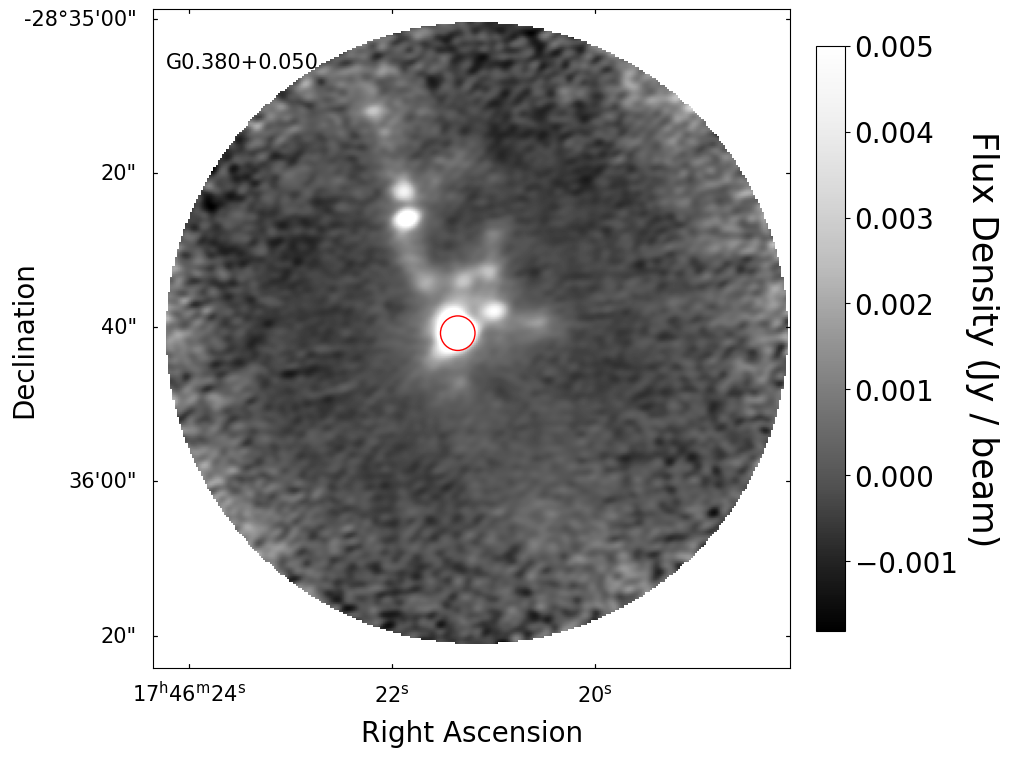

In [1]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt    
from matplotlib.patches import Rectangle
from astropy.wcs import WCS                 
from astropy import units as u  
import pylab
import numpy as np
from spectral_cube import SpectralCube     
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
path ="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
image=fits.getdata(path)
header=fits.getheader(path)
w1=WCS(header)
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)

image_2D = pylab.squeeze(image)


#init plot and axes
fig1 = plt.figure(1,figsize=(10,10),constrained_layout=True)       
ax1 = plt.subplot(projection=w1)            
RA = ax1.coords[0]
Dec = ax1.coords[1]



#shows image
#plt.plot(np.array([100,100]),np.array([200,300]),color="red",linewidth=3)
im1 = plt.imshow(image_2D,cmap='Greys_r',vmax=0.005)

#plots the subcube patch
circle1 = plt.Circle((166, 175), 8, color='r',fill=False)
plt.gca().add_patch(circle1)

#formats plot
RA.set_ticks(size=-3)                      
Dec.set_ticks(size=-3)
ax1.tick_params(axis='both', which='major', pad=15)
plt.xlabel('Right Ascension',fontsize=20,labelpad=1)
plt.ylabel('Declination',fontsize=20,labelpad=0) 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.annotate('G0.380+0.050',fontsize=15,xy=(0.02,0.91),xycoords="axes fraction")
plt.xlim(25,320)
plt.ylim(20,325)
cb=plt.colorbar(im1,fraction=0.046,pad=0.04) 
cb.set_label(label='Flux Density (Jy / beam)',fontsize=25,rotation=270,labelpad=30) 
cb.ax.tick_params(which = 'major', labelsize = 20) 

#saves fig
pylab.savefig("continuum.pdf",dpi=250,pad_inches=1)
pylab.savefig("continuum.png",dpi=250,pad_inches=1)

